# Logistic Regression

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('H:/Machine Learning Module/Data sets/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


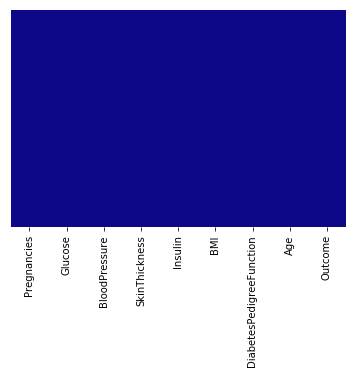

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')
plt.show()

In [10]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=0.2)

In [11]:
logReg = LogisticRegression()
logReg.fit(X_train,y_train)
confidence = logReg.score(X_test,y_test)
print(confidence)

0.746753246753


In [12]:
prediction = logReg.predict(X_test)
print(prediction)

[0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0]


In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction))

[[84  6]
 [33 31]]


# SVM

In [17]:
from sklearn.svm import SVC #support vector classifier
model = SVC(kernel ='rbf') #E-exponential 2.71^10
model.fit(X_train,y_train)
confidence1 = model.score(X_test,y_test)
print(confidence1)
y_pred = model.predict(X_test)

0.584415584416


In [16]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[90,  0],
       [64,  0]], dtype=int64)

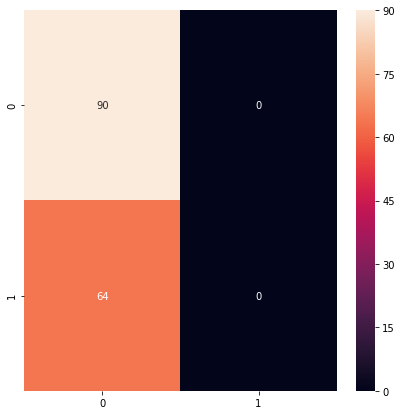

In [21]:
import seaborn as sns
fig ,ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_mat,annot=True,fmt='d')#,#xticklabels=category_id_df.Product.values,yticklabels=category_id_df.Product.values)
plt.show()

# MultinomialNB

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [29]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Outcome',axis=1),df['Outcome'],random_state=0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB()
clf.fit(X_train_tfidf,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [8, 576]